In [1]:
import pandas as pd
import numpy as np
import datetime  
import time
import networkx as nx
import matplotlib.pyplot as plt
from itertools import chain
from matplotlib.pyplot import figure
import operator

In [2]:
convertTable = dict()
convertTable[0]= str
convertTable[1]= str
convertTable[2]= str
convertTable['ID']= str
company_id = pd.read_csv('CompanyIndex.csv', dtype= convertTable)
# call_d = pd.read_csv('calls.csv', header=None, dtype= convertTable)
# emails = pd.read_csv('emails.csv', header=None, dtype= convertTable)
meetings = pd.read_csv('meetings.csv', header=None, dtype= convertTable)
# purchases = pd.read_csv('purchases.csv', header=None, dtype= convertTable)
suspi_call = pd.read_csv('Suspicious_calls.csv', header=None, dtype= convertTable)
suspi_email = pd.read_csv('Suspicious_emails.csv', header=None, dtype= convertTable)
suspi_meetings = pd.read_csv('Suspicious_meetings.csv', header=None, dtype= convertTable)
suspi_purchases = pd.read_csv('Suspicious_purchases.csv', header=None, dtype= convertTable)

In [3]:
print('len company_id: ',len(company_id))
# print('len call_d: ',len(call_d))
# print('len emails: ',len(emails))
print('len meetings: ',len(meetings))
# print('len purchases: ',len(purchases))
# print('len suspi_call: ',len(suspi_call))
# print('len suspi_email: ',len(suspi_email))
print('len suspi_meetings: ',len(suspi_meetings))
# print('len suspi_purchases: ',len(suspi_purchases))

len company_id:  642631
len meetings:  127351
len suspi_meetings:  5


In [4]:
# จากข้อมูลไฟล์ Suspicious_purchases พบว่า
# มีการทุจริตในการซื้อขายระหว่าง id '1847246' และ id'2038003'

suspi_purchases

,0,1,2,3
0,1847246,2,2038003,74565933


In [5]:
company_id['name'] = company_id['first']+'  '+company_id['last']
company_id = company_id.drop(['first','last'], axis=1)
company_id

,ID,name
0,253,Margaret Young
1,255,Adele Burke
2,262,Zetta Unglaub
3,266,Ruthie Luzier
4,270,Christina Little
...,...,...
642626,2044645,Oscar Hutley
642627,2045457,Armand Millerbernd
642628,2047240,Duane Owens
642629,2050522,Alma Borok


เนื่องจากข้อมูลมีขนาดใหญ่มากทำให้ใช้เวลานาน เลือกเลือกมาแค่คนที่เกี่ยวข้องกับบุคคลน่าสงสัย

หา ID ของบุคคลน่าสงสัยโดยรวมรวมมาจากไฟล์ 
- Suspicious_calls
- Suspicious_emails
- Suspicious_meetings
- Suspicious_purchases

In [6]:

susCall_list = list(chain(suspi_call[0], suspi_call[2]))
susEmail_list = list(chain(suspi_email[0], suspi_email[2]))
susMeet_list =list(chain(suspi_meetings[0], suspi_meetings[2]))
susPurc_list = list(chain(suspi_purchases[0], suspi_purchases[2]))


susp_id = list(chain(susCall_list, susEmail_list, susMeet_list, susPurc_list))

susp_id = set(susp_id)
susp_id = list(susp_id)
print('จำนวนคนทั้งหมดที่อยู่ในไฟล์ผู้ต้องสงสัย ',len(susp_id), 'คน ที่มี id ดังนี้')
susp_id

จำนวนคนทั้งหมดที่อยู่ในไฟล์ผู้ต้องสงสัย  20 คน ที่มี id ดังนี้


['728286',
 '1642962',
 '234164',
 '696047',
 '2038003',
 '51780',
 '1023940',
 '1663285',
 '857138',
 '969089',
 '623027',
 '1108217',
 '505444',
 '387200',
 '28520',
 '1039322',
 '1847246',
 '1690582',
 '387676',
 '1886447']

เนื่องจากข้อมูลมีขนาดใหญ่ 
- calls และ emails มีขนาดใหญ่ถึง 10-15 ล้านแถว 
- purchases ประมาณ 700,000 row และ meeting ประมาณ 120,000

ทำให้ใช้เวลาประมวลผลมาก จึงทำการจัดการข้อมูลให้เหลือที่ข้อมูลที่เกี่ยวข้องกับ 20 คนน่าสงสัย
โดย 20 id น่าสงสัยดังกล่าว
- data แบบที่1 คนน่าสงสัยอาจอยู่ในฝั่งเป็นผู้ติดต่อ(column 0) หรืออาจอยู่ในฝั่งได้รับการติดต่อ(column 2)
- data แบบที่2 คนน่าสงสัยอาจอยู่ในฝั่งเป็นผู้ติดต่อ(column 0) และ อยู่ในฝั่งได้รับการติดต่อ(column 2) (ซึ่งเป็นการติดต่อกันระหว่างคนน่าสงสัยกับคนน่าสงสัย)


โดยจัดการ clean ข้อมูลใหม่ดังนี้

In [7]:
## data แบบที่1 

In [8]:
# # DF filter เอามาแต่ id น่าสงสัยที่เกี่ยวข้อง
# susCall_1 = call_d[call_d[0].str.contains('|'.join(susp_id))]
# susCall_2 = call_d[call_d[2].str.contains('|'.join(susp_id))]
# allSusCall = pd.concat([susCall_1, susCall_2])
# allSusCall.head()

In [9]:
# susEmail_1 = emails[emails[0].str.contains('|'.join(susp_id))]
# susEmail_2 = emails[emails[2].str.contains('|'.join(susp_id))]
# allSusEmail = pd.concat([susEmail_1, susEmail_2])
# allSusEmail.head()

In [10]:
susMeet_1 = meetings[meetings[0].str.contains('|'.join(susp_id))]
susMeet_2 = meetings[meetings[2].str.contains('|'.join(susp_id))]
allSusMeet = pd.concat([susMeet_1, susMeet_2])
allSusMeet.head()

,0,1,2,3
85,857138,3,175354,15537833
89,857138,3,175354,15616833
90,857138,3,981554,15616833
91,857138,3,1886447,15616833
92,1886447,3,981554,15616833


In [11]:
# susPurc_1 = purchases[purchases[0].str.contains('|'.join(susp_id))]
# susPurc_2 = purchases[purchases[2].str.contains('|'.join(susp_id))]
# allSusPurc = pd.concat([susPurc_1, susPurc_2])
# allSusPurc.head()

In [12]:
## data แบบที่2: คนน่าสงสัยติดต่อกับคนน่าสงสัย

In [13]:

# # คัดคนน่าสงสัย call กับคนน่าสงสัย
# susCall_each = call_d[(call_d[0].str.contains('|'.join(susp_id))) & (call_d[2].str.contains('|'.join(susp_id)))] 
# susCall_each.head()

In [14]:
# # คัดคนน่าสงสัย email กับคนน่าสงสัย
# susEmail_each = emails[(emails[0].str.contains('|'.join(susp_id))) & (emails[2].str.contains('|'.join(susp_id)))] 
# susEmail_each.head()

In [15]:
# คัดคนน่าสงสัย meet กับคนน่าสงสัย
susMeet_each = meetings[(meetings[0].str.contains('|'.join(susp_id))) & (meetings[2].str.contains('|'.join(susp_id)))] 
susMeet_each.head()

,0,1,2,3
91,857138,3,1886447,15616833
6111,857138,3,728286,30755533
80886,1108217,3,728286,70855533
86678,857138,3,1690582,72655933
87892,1690582,3,1847246,73055933


In [16]:
# # คัดคนน่าสงสัย purchases กับคนน่าสงสัย
# susPurc_each = purchases[(purchases[0].str.contains('|'.join(susp_id))) & (purchases[2].str.contains('|'.join(susp_id)))] 
# susPurc_each

# วิเคราะห์จากข้อมูลการนัดพบกัน (Meeting Data)

In [17]:
def generate_deges(graph):
    edges=[]
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node,neighbour))
    return edges

In [18]:
from collections import defaultdict

graph_meet = defaultdict(list)

# adding edge to graph
def addEdge(graph,u,v):
    graph[u].append(v)

# definition of fn
def generate_edges(graph):
    edges=[]
    
    # for each node in graph
    for node in graph:
        
        #for each neighbour node of a single node
        for neighbour in graph[node]:
            
            #if edge exists then append
            edges.append((node, neighbour))
    return edges

In [19]:
# รูปแบบที่ 1 การติดต่อระหว่างฝ่ายใดฝ่ายหนึ่งเป็นผู้ต้องสงสัย

In [20]:
for i in allSusMeet[0]:
    for j in allSusMeet[2]:
        addEdge(graph_meet,i,j)

In [21]:
pair_ = generate_edges(graph_meet)
print(type(pair_))
print('edges = ',len(pair_))
pair_

<class 'list'>
edges =  1225


[('857138', '175354'),
 ('857138', '175354'),
 ('857138', '981554'),
 ('857138', '1886447'),
 ('857138', '981554'),
 ('857138', '728286'),
 ('857138', '1821582'),
 ('857138', '1549182'),
 ('857138', '1869091'),
 ('857138', '1954466'),
 ('857138', '1608968'),
 ('857138', '1884843'),
 ('857138', '1632073'),
 ('857138', '1600928'),
 ('857138', '1525352'),
 ('857138', '1668021'),
 ('857138', '1668021'),
 ('857138', '1668021'),
 ('857138', '1668021'),
 ('857138', '1957292'),
 ('857138', '1971777'),
 ('857138', '728286'),
 ('857138', '981554'),
 ('857138', '1690582'),
 ('857138', '981554'),
 ('857138', '1847246'),
 ('857138', '1685313'),
 ('857138', '2028291'),
 ('857138', '1627133'),
 ('857138', '1886447'),
 ('857138', '1886447'),
 ('857138', '728286'),
 ('857138', '728286'),
 ('857138', '1690582'),
 ('857138', '1847246'),
 ('857138', '175354'),
 ('857138', '175354'),
 ('857138', '981554'),
 ('857138', '1886447'),
 ('857138', '981554'),
 ('857138', '728286'),
 ('857138', '1821582'),
 ('8571

In [22]:
from collections import defaultdict
graph_dic = defaultdict(list)
for val in pair_:
    graph_dic[val[0]].append(val[1])
    
graph_dic

defaultdict(list,
            {'857138': ['175354',
              '175354',
              '981554',
              '1886447',
              '981554',
              '728286',
              '1821582',
              '1549182',
              '1869091',
              '1954466',
              '1608968',
              '1884843',
              '1632073',
              '1600928',
              '1525352',
              '1668021',
              '1668021',
              '1668021',
              '1668021',
              '1957292',
              '1971777',
              '728286',
              '981554',
              '1690582',
              '981554',
              '1847246',
              '1685313',
              '2028291',
              '1627133',
              '1886447',
              '1886447',
              '728286',
              '728286',
              '1690582',
              '1847246',
              '175354',
              '175354',
              '981554',
              '1886447',
          

In [23]:
print('nodes = ',len(graph_dic.keys()))

nodes =  13


In [24]:
edges = len(pair_)
nodes = len(graph_dic.keys())

print('Grapth Metrics ระหว่างผู้ติดต่อและผู้ถูกติดต่อ โดยมีฝ่ายใดฝ่ายหนึ่งเป็นผู้ต้องสงสัย')
print('size = edges = ', edges)
print('Degree(average) = (2edges)/nodes = ', (2*edges)/nodes)

Grapth Metrics ระหว่างผู้ติดต่อและผู้ถูกติดต่อ โดยมีฝ่ายใดฝ่ายหนึ่งเป็นผู้ต้องสงสัย
size = edges =  1225
Degree(average) = (2edges)/nodes =  188.46153846153845


In [ ]:
# รูปแบบที่ 2 การติดต่อทั้งสองฝ่ายเป็นผู้ต้องสงสัย

In [25]:
for i in susMeet_each[0]:
    for j in susMeet_each[2]:
        addEdge(graph_meet,i,j)

In [26]:
pair_ = generate_edges(graph_meet)
print(type(pair_))
print('edges = ',len(pair_))
pair_[:5]

<class 'list'>
edges =  1250


[('857138', '175354'),
 ('857138', '175354'),
 ('857138', '981554'),
 ('857138', '1886447'),
 ('857138', '981554')]

In [27]:
from collections import defaultdict
graph_dic = defaultdict(list)
for val in pair_:
    graph_dic[val[0]].append(val[1])
    
graph_dic

defaultdict(list,
            {'857138': ['175354',
              '175354',
              '981554',
              '1886447',
              '981554',
              '728286',
              '1821582',
              '1549182',
              '1869091',
              '1954466',
              '1608968',
              '1884843',
              '1632073',
              '1600928',
              '1525352',
              '1668021',
              '1668021',
              '1668021',
              '1668021',
              '1957292',
              '1971777',
              '728286',
              '981554',
              '1690582',
              '981554',
              '1847246',
              '1685313',
              '2028291',
              '1627133',
              '1886447',
              '1886447',
              '728286',
              '728286',
              '1690582',
              '1847246',
              '175354',
              '175354',
              '981554',
              '1886447',
          

In [28]:
edges = len(pair_)
nodes = len(graph_dic.keys())

print('Grapth Metrics ระหว่างผู้ติดต่อและผู้ถูกติดต่อ โดยทั้งสองฝ่ายเป็นผู้ต้องสงสัย')
print('size = edges = ', edges)
print('Degree(average) = (2edges)/nodes = ', (2*edges)/nodes)

Grapth Metrics ระหว่างผู้ติดต่อและผู้ถูกติดต่อ โดยทั้งสองฝ่ายเป็นผู้ต้องสงสัย
size = edges =  1250
Degree(average) = (2edges)/nodes =  192.30769230769232


## ใช้ NetworkX เพื่อดู visual
import networkx as nx

In [29]:
# รูปแบบที่ 1 การติดต่อระหว่างฝ่ายใดฝ่ายหนึ่งเป็นผู้ต้องสงสัย

In [30]:
meetNX = allSusMeet.groupby(by=[0,2]).count()
meetNX = meetNX.reset_index()
meetNX = meetNX.drop([3], axis=1)
sum_meet = meetNX[1].sum()
meetNX[1] = meetNX[1]/sum_meet
meetNX = meetNX.rename(columns={0:'from',2:'destination', 1:'weight'})
meetNX.head()

,from,destination,weight
0,1108217,1525352,0.028571
1,1108217,1600928,0.028571
2,1108217,1627133,0.028571
3,1108217,1685313,0.028571
4,1108217,1971777,0.028571


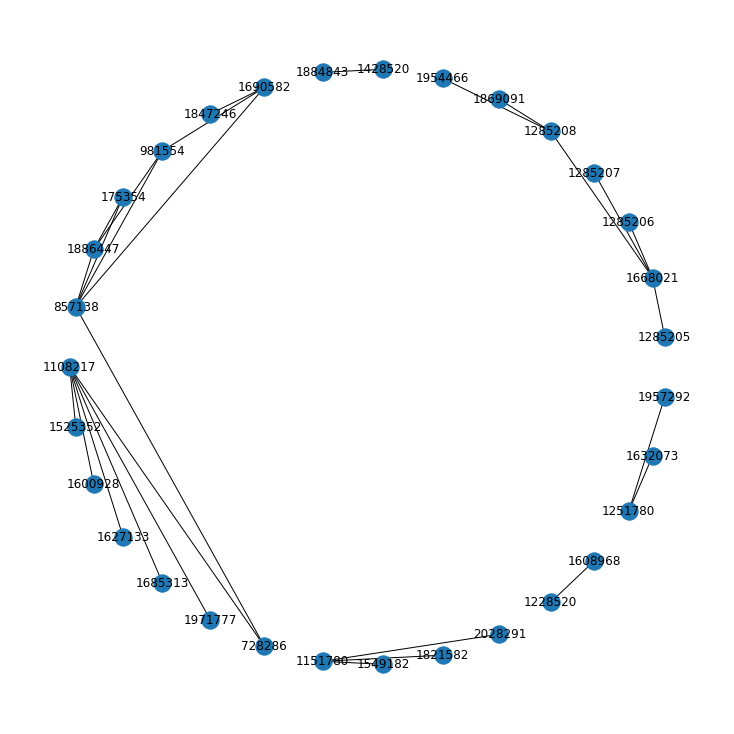

In [33]:
G = nx.Graph()
G = nx.from_pandas_edgelist(meetNX, 'from', 'destination')
figure(figsize=(10, 10))
nx.draw_shell(G, with_labels=True)

In [34]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df1 = s.to_frame().sort_values('connections', ascending=False)
df1

,connections
1108217,6
857138,5
1668021,4
1886447,3
1151780,3
981554,3
1690582,3
1285208,3
175354,2
728286,2


In [35]:
# รูปแบบที่ 2 การติดต่อทั้งสองฝ่ายเป็นผู้ต้องสงสัย

In [36]:
susmeetNX = susMeet_each.groupby(by=[0,2]).count()
susmeetNX = susmeetNX.reset_index()
susmeetNX = susmeetNX.drop([3], axis=1)
sum_meet = susmeetNX[1].sum()
susmeetNX[1] = susmeetNX[1]/sum_meet
susmeetNX = susmeetNX.rename(columns={0:'from',2:'destination', 1:'weight'})
susmeetNX

,from,destination,weight
0,1108217,728286,0.2
1,1690582,1847246,0.2
2,857138,1690582,0.2
3,857138,1886447,0.2
4,857138,728286,0.2


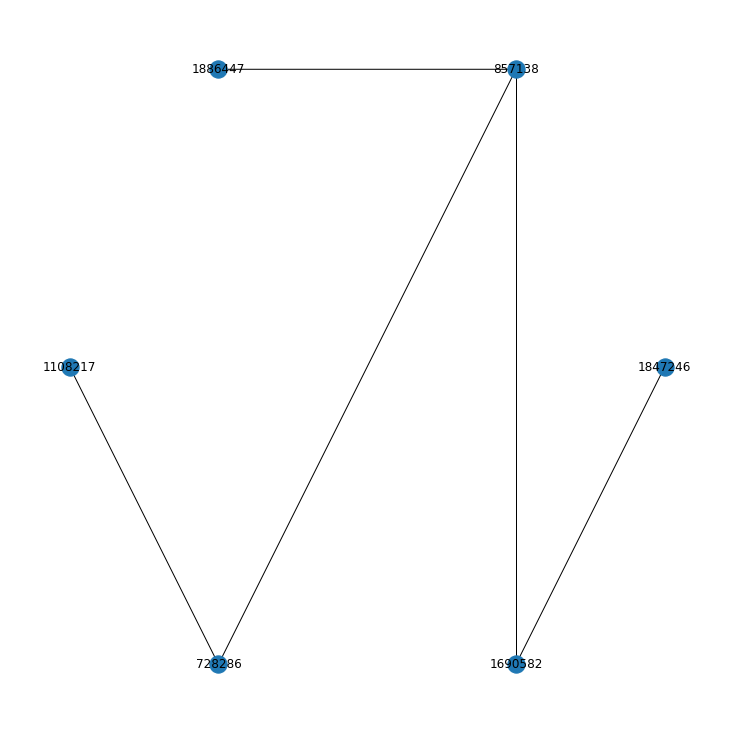

In [37]:
G = nx.Graph()
G = nx.from_pandas_edgelist(susmeetNX, 'from', 'destination')
figure(figsize=(10, 10))
nx.draw_shell(G, with_labels=True)

In [38]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2

,connections
857138,3
728286,2
1690582,2
1108217,1
1847246,1
1886447,1


In [39]:
# Degree Centrality
deg_centrality = nx.degree_centrality(G)
  
# G is the Karate Club Graph
deg_centrality= sorted(deg_centrality.items(), key=operator.itemgetter(1), reverse=True)
deg_centrality

[('857138', 0.6000000000000001),
 ('728286', 0.4),
 ('1690582', 0.4),
 ('1108217', 0.2),
 ('1847246', 0.2),
 ('1886447', 0.2)]

In [40]:
# Closeness Centrality 
close_centrality = nx.closeness_centrality(G)
  
# G is the Karate Social Graph
close_centrality = sorted(close_centrality.items(), key=operator.itemgetter(1), reverse=True)
close_centrality

[('857138', 0.7142857142857143),
 ('728286', 0.5555555555555556),
 ('1690582', 0.5555555555555556),
 ('1886447', 0.45454545454545453),
 ('1108217', 0.38461538461538464),
 ('1847246', 0.38461538461538464)]

In [41]:
# Betweenness Centrality :
btw_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)

btw_centrality= sorted(btw_centrality.items(), key=operator.itemgetter(1), reverse=True)
btw_centrality

[('857138', 0.8),
 ('728286', 0.4),
 ('1690582', 0.4),
 ('1108217', 0.0),
 ('1847246', 0.0),
 ('1886447', 0.0)]